In [1]:
%%capture
%cd ".."
%matplotlib widget
%config InlineBackend.print_figure_kwargs={'bbox_inches': None}

import matplotlib
matplotlib.rcParams['figure.dpi'] = 80

# Demo - A random forest model for estimating/predicting track movement

In [2]:
%%capture

from src.modeller import TrackMovementEstimator

# Specify element, direction and subsection length over which average movement is calculated
element = 'Left Top'
direction = 'Up'
subsect_len = 10

tme = TrackMovementEstimator(element=element, direction=direction, subsect_len=subsect_len)

## 1. Create training and test data sets.

In [3]:
tme.get_training_test_sets(test_size=0.2, random_state=1)

Calculating track movement ... Done.
Collating features: 
  ballasts (src. Ballast summary) ... Done.
  structures (src. CARRS and OPAS) ... Done.
Finalising the data integration ... Done.
Splitting into training and test sets ... Done.
The data is now ready for modelling.


In [4]:
tme.X_train

,Curvature,Cant,Max speed,Max axle load,Overline bridges,Underline bridges,Retaining walls,Tunnels,Stations
3306,0.000000,0.00,90.0,26.0,0,0,0,0,0
1910,-0.000858,-110.00,95.0,26.0,0,0,0,0,0
1192,-0.000545,-89.01,80.0,26.0,0,0,0,0,0
981,-0.000767,-130.00,95.0,26.0,0,0,0,0,0
5139,-0.000256,-63.00,110.0,26.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1016,0.000000,0.00,95.0,26.0,0,1,0,0,0
5907,-0.000504,-127.00,110.0,26.0,0,0,0,0,0
4597,-0.001060,-125.00,85.0,26.0,0,0,0,0,0
243,-0.000185,-21.42,95.0,26.0,0,0,0,0,0


In [5]:
tme.y_train

2736    1
1578    3
1060    0
870     2
4512    3
       ..
905     2
5192    2
3980    2
235     1
5157    3
Name: lateral_displacement_mean, Length: 5433, dtype: int64

In [6]:
tme.X_test

,Curvature,Cant,Max speed,Max axle load,Overline bridges,Underline bridges,Retaining walls,Tunnels,Stations
5628,0.000731,103.38,100.0,26.0,0,0,0,0,0
5696,0.000955,135.00,100.0,26.0,0,0,0,0,0
5431,0.000960,142.00,100.0,26.0,0,0,0,0,0
3471,-0.000784,-108.50,90.0,26.0,0,0,0,0,0
2908,-0.001264,-155.00,85.0,26.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
247,-0.000337,-39.00,95.0,26.0,0,0,0,0,0
3904,0.000000,0.00,125.0,26.0,0,0,0,0,0
1054,0.000000,0.00,95.0,26.0,0,0,0,0,0
3191,-0.000858,-156.00,90.0,26.0,0,0,0,0,0


In [7]:
tme.y_test

4958    3
4999    0
4793    1
2901    2
2394    2
       ..
239     2
3309    2
943     0
2621    3
3431    3
Name: lateral_displacement_mean, Length: 1359, dtype: int64

## 2. Train an RF model

In [8]:
tme.classifier(n_estimators=300, max_depth=15, oob_score=True, n_jobs=8)


Model training in process ... 


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.3s finished


Done.

Testing accuracy ... 
Done.

Mean accuracy: 49.96%

                    Importance
Curvature            0.388747
Cant                 0.372477
Max speed            0.201602
Underline bridges    0.009513
Overline bridges     0.007261
Max axle load        0.006700
Retaining walls      0.006048
Tunnels              0.005787
Stations             0.001866


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


## 3. Create a confusion matrix

### 3.1 View the confusion matrix for the trained RF model

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


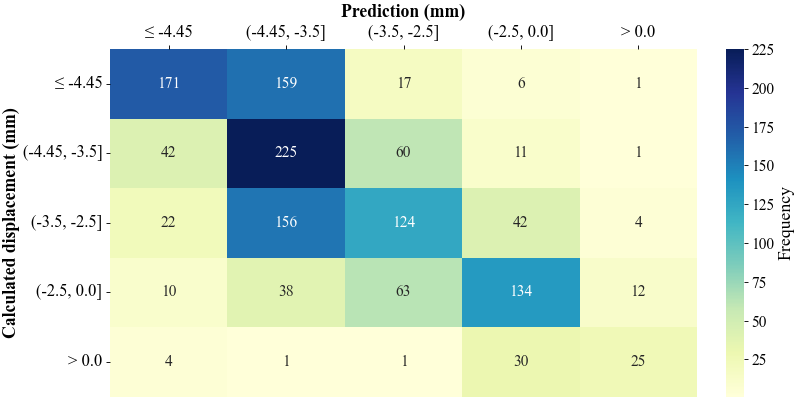

In [9]:
tme.view_confusion_matrix()

### 3.2 Normalise the confusion matrix over the predicted labels

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


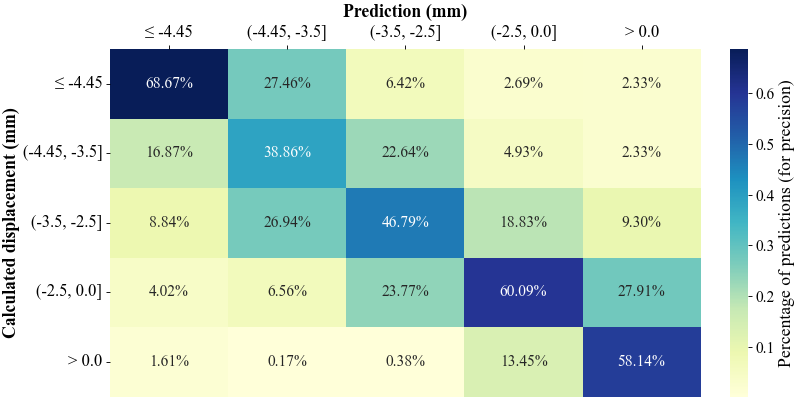

In [10]:
tme.view_confusion_matrix(normalise='pred')